In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('bdastudents.csv', sep = ';')

In [ ]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,1,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,0,0,0
1,GP,F,17,U,1,T,1,1,at_home,other,...,5,3,3,1,1,3,4,0,0,0
2,GP,F,15,U,0,T,1,1,at_home,other,...,4,3,2,2,3,3,10,1,1,1
3,GP,F,15,U,1,T,4,2,health,services,...,3,2,2,1,1,5,2,2,1,2
4,GP,F,16,U,1,T,3,3,other,other,...,4,3,2,1,2,5,4,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,MS,F,19,R,1,T,2,3,services,other,...,5,4,2,1,2,5,4,1,1,1
1040,MS,F,18,U,0,T,3,1,teacher,services,...,4,3,4,1,1,1,4,2,2,2
1041,MS,F,18,U,1,T,1,1,other,other,...,1,1,1,1,1,5,6,1,1,1
1042,MS,M,17,U,0,T,3,1,services,services,...,2,4,5,3,4,2,6,1,1,1


In [ ]:
df.isnull().sum()

,0
school,0
sex,0
age,0
address,0
famsize,0
Pstatus,0
Medu,0
Fedu,0
Mjob,0
Fjob,0


In [ ]:
df['school'].value_counts()

,count
school,
GP,772
MS,272


In [ ]:
df['sex'].value_counts()

,count
sex,
F,591
M,453


In [ ]:
df['GRate'] = df['G2']-df['G1']

<Axes: xlabel='age'>

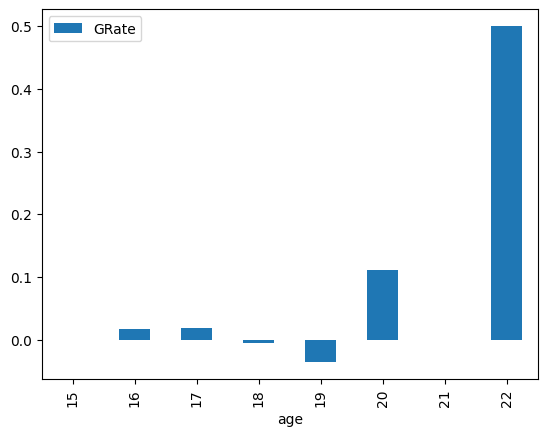

In [ ]:
pd.pivot_table(data = df,
               index = 'age',
               values = 'GRate',
               aggfunc = 'mean').plot.bar()

In [ ]:
pivot = pd.pivot_table(data = df,
               index = 'sex',
               columns = 'G3',
               values = 'age',
               margins = True,
               margins_name = 'Total',
               aggfunc = 'count')
pivot['mean'] = (pivot[0]*0+pivot[1]+pivot[2]*2)/pivot['Total']
pivot

G3,0,1,2,Total,mean
sex,,,,,
F,47,424,120,591,1.123519
M,34,335,84,453,1.110375
Total,81,759,204,1044,1.117816


In [ ]:
pivot = pd.pivot_table(data = df,
               index = ['school', 'sex'],
               columns = 'G3',
               values = 'age',
               margins = True,
               margins_name = 'Total',
               aggfunc = 'count')
pivot['mean'] = (pivot[0]*0+pivot[1]+pivot[2]*2)/pivot['Total']
pivot

G3           0    1    2  Total      mean
school sex                               
GP     F    35  296   89    420  1.128571
       M    24  250   78    352  1.153409
MS     F    12  128   31    171  1.111111
       M    10   85    6    101  0.960396
Total       81  759  204   1044  1.117816

<Axes: >

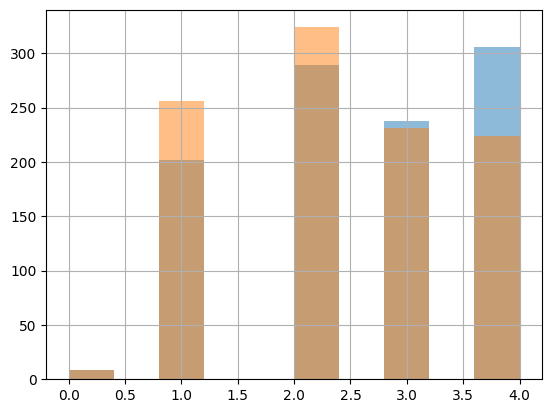

In [ ]:
import matplotlib.pyplot as plt
df['Medu'].hist(alpha = 0.5)
df['Fedu'].hist(alpha = 0.5)

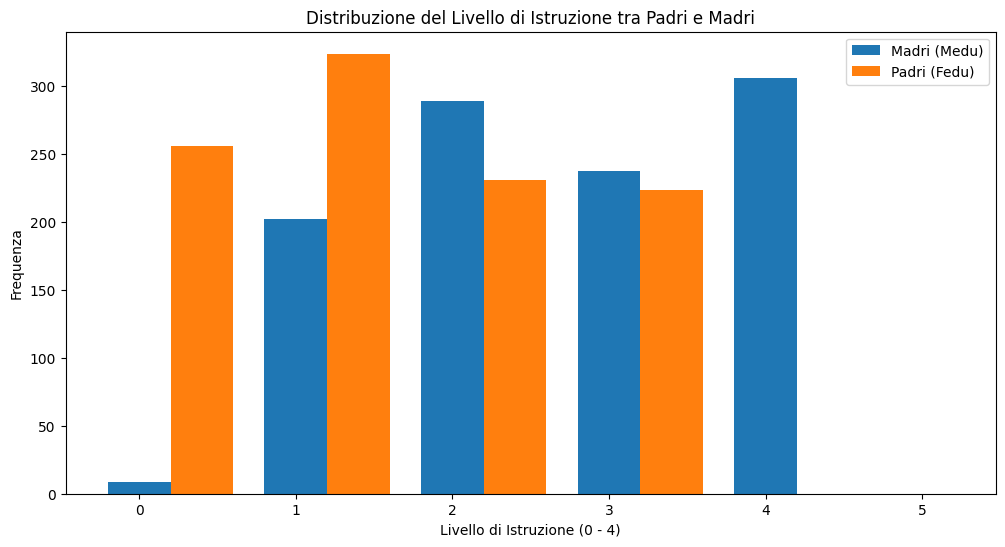

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Definire i bin per garantire che entrambi gli istogrammi siano allineati
bins = np.arange(0, 6)  # Intervalli per i livelli di educazione (0-4, inclusi estremi)

plt.figure(figsize=(12, 6))

# Istogramma per Medu (Madri)
plt.hist(df['Medu'], bins=bins - 0.2, label='Madri (Medu)', width=0.4)

# Istogramma per Fedu (Padri)
plt.hist(df['Fedu'], bins=bins + 0.2, label='Padri (Fedu)', width=0.4)

# Titoli e Etichette
plt.title('Distribuzione del Livello di Istruzione tra Padri e Madri')
plt.xlabel('Livello di Istruzione (0 - 4)')
plt.ylabel('Frequenza')
plt.xticks(bins)  # Assicurarsi che le etichette degli assi siano allineate con i bin
plt.legend()
plt.show()

In [ ]:
numerical_cols = [cname for cname in df.columns if
                df[cname].dtype in ['int64', 'float64']]
numeric = df[numerical_cols]
numerical_cols.remove('G1')
numerical_cols.remove('G2')
reduced = df[['G1','G2']]
less_reduced = df[numerical_cols]


In [ ]:
from sklearn.model_selection import train_test_split
X_train_numeric, X_test_numeric, y_train_numeric, y_test_numeric = train_test_split(
    numeric.drop(columns = ['G3']), df['G3'], test_size=0.33, random_state=42)
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(
    reduced, df['G3'], test_size=0.33, random_state=42)
X_train_less, X_test_less, y_train_less, y_test_less = train_test_split(
    less_reduced.drop(columns = ['G3']), df['G3'], test_size=0.33, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy less_reduced:  0.7188405797101449
Accuracy reduced:  0.9101449275362319
Accuracy numeric:  0.8579710144927536


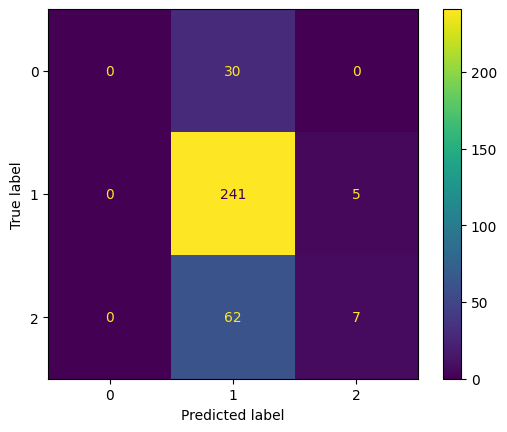

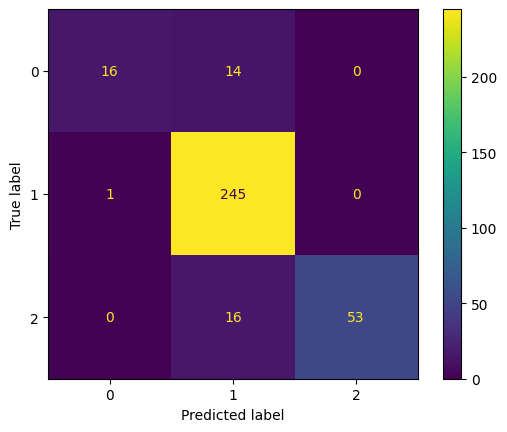

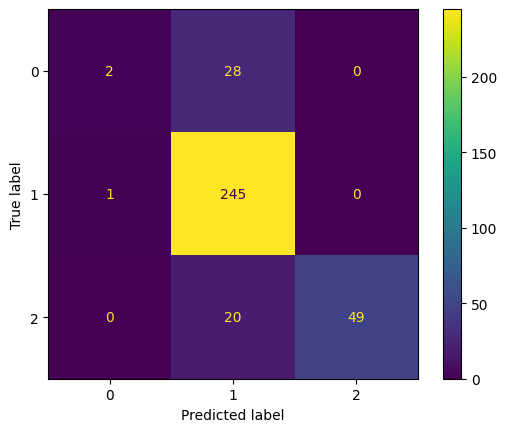

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

log = LogisticRegression(solver = 'saga')

log.fit(X_train_less, y_train_less)
pred_less = log.predict(X_test_less)
print("Accuracy less_reduced: ", accuracy_score(y_test_less, pred_less))
cm_less = confusion_matrix(y_test_less, pred_less)
disp_less = ConfusionMatrixDisplay(confusion_matrix=cm_less)

log.fit(X_train_reduced, y_train_reduced)
print("Accuracy reduced: ", accuracy_score(y_test_reduced, log.predict(X_test_reduced)))
pred_reduced = log.predict(X_test_reduced)
cm_reduced = confusion_matrix(y_test_reduced, pred_reduced)
disp_reduced = ConfusionMatrixDisplay(confusion_matrix=cm_reduced)

log.fit(X_train_numeric, y_train_numeric)
pred_numeric = log.predict(X_test_numeric)
print("Accuracy numeric: ", accuracy_score(y_test_numeric, log.predict(X_test_numeric)))
cm_numeric = confusion_matrix(y_test_numeric, pred_numeric)
disp_numeric = ConfusionMatrixDisplay(confusion_matrix=cm_numeric)

disp_less.plot()
disp_reduced.plot()
disp_numeric.plot()

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

print("Accuracy less_reduced: ", cross_val_score(DecisionTreeClassifier(), less_reduced.drop(columns = 'G3'), df['G3'], cv = 10).mean())
print("Accuracy reduced: ", cross_val_score(DecisionTreeClassifier(), reduced, df['G3'], cv = 10).mean())
print("Accuracy numeric: ", cross_val_score(DecisionTreeClassifier(), numeric.drop(columns = 'G3'), df['G3'], cv = 10).mean())


Accuracy less_reduced:  0.6865934065934065
Accuracy reduced:  0.908937728937729
Accuracy numeric:  0.8542673992673994


In [ ]:
numeric['age'] = pd.cut(numeric['age'], bins = 3, labels = [0,1,2])

<ipython-input-115-b9c894a96371>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric['age'] = pd.cut(numeric['age'], bins = 3, labels = [0,1,2])


In [ ]:
print("Accuracy numeric: ", cross_val_score(DecisionTreeClassifier(), numeric.drop(columns = 'G3'), df['G3'], cv = 10).mean())


Accuracy numeric:  0.8409065934065934


In [ ]:
numeric['age'] = pd.cut(numeric['age'], bins = 3, labels = ['0','1','2'])
numeric = pd.get_dummies(numeric)

In [ ]:
print("Accuracy numeric: ", cross_val_score(DecisionTreeClassifier(), numeric.drop(columns = 'G3'), df['G3'], cv = 10).mean())

Accuracy numeric:  0.8428388278388278


In [ ]:
numeric['Mjob'] = df['Mjob']
numeric['Fjob'] = df['Fjob']
numeric = pd.get_dummies(numeric)

In [ ]:
print("Accuracy numeric: ", cross_val_score(DecisionTreeClassifier(), numeric.drop(columns = 'G3'), df['G3'], cv = 10).mean())

Accuracy numeric:  0.850503663003663


In [ ]:
numerical_cols = [cname for cname in df.columns if
                df[cname].dtype in ['int64', 'float64']]
gp = df[numerical_cols][df['school'] == 'GP']

In [ ]:
ms = df[numerical_cols][df['school'] == 'MS']

In [ ]:
X_train_gp, X_test_gp, y_train_gp, y_test_gp = train_test_split(gp.drop(columns = ['G3']), gp['G3'], test_size = 0.33)
X_train_ms, X_test_ms, y_train_ms, y_test_ms = train_test_split(ms.drop(columns = ['G3']), ms['G3'], test_size = 0.33)

In [ ]:
dtc_gp = DecisionTreeClassifier()
dtc_gp.fit(X_train_gp, y_train_gp)
dtc_ms = DecisionTreeClassifier()
dtc_ms.fit(X_train_ms, y_train_ms)
X_test = pd.concat([X_test_ms, X_test_gp])
y_test = pd.concat([y_test_ms, y_test_gp])


In [ ]:
print("gp: ", accuracy_score(y_test, dtc_gp.predict(X_test)))
print("ms: ", accuracy_score(y_test, dtc_ms.predict(X_test)))

gp:  0.8115942028985508
ms:  0.8869565217391304
